
__Challenge__ 

- Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

- First, dive into the data that we have and see which features are most important. raw features or the generated dummies. use PCA or correlation matrices.

- Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
y2015 = pd.read_csv('LoanStats3d.csv',
    skipinitialspace=True,
    header=1)

# Note the warning about dtypes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [70]:
# How many attributes? 111

len(y2015.columns)

#do not run this until you clean up the data 
# getting dummies for .4 mln data points is not a joke 

#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score
#
#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#y = y2015['loan_status']
#
#X = pd.get_dummies(X)
#
#cross_val_score(rfc, X, y, cv=10)

111

In [69]:
# let's look at all categorical variables

categorical = y2015.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
    print('New atribute:', i)
    print('Unique values: ', column.nunique())  # returns the number of unique elements in the object 
    print("Null values: ", column.isna().sum())

# some columns have many (hundreds and thousands) unique/distinct types, 
# - drop above 30 unique values 
# - convert to numeric 


New atribute: id
Unique values:  421097
Null values:  0
New atribute: term
Unique values:  2
Null values:  2
New atribute: int_rate
Unique values:  110
Null values:  2
New atribute: grade
Unique values:  7
Null values:  2
New atribute: sub_grade
Unique values:  35
Null values:  2
New atribute: emp_title
Unique values:  120812
Null values:  23876
New atribute: emp_length
Unique values:  11
Null values:  23819
New atribute: home_ownership
Unique values:  4
Null values:  2
New atribute: verification_status
Unique values:  3
Null values:  2
New atribute: issue_d
Unique values:  12
Null values:  2
New atribute: loan_status
Unique values:  7
Null values:  2
New atribute: pymnt_plan
Unique values:  1
Null values:  2
New atribute: url
Unique values:  421095
Null values:  2
New atribute: desc
Unique values:  34
Null values:  421052
New atribute: purpose
Unique values:  14
Null values:  2
New atribute: title
Unique values:  27
Null values:  134
New atribute: zip_code
Unique values:  914
Null val

In [71]:
## Data cleaning 1:

# Convert ID and Interest rate to numeric 

y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015['term'] = pd.to_numeric(y2015['term'].str.strip(' months'), errors='coerce')

In [72]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60.0,14.85,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36.0,7.49,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36.0,7.49,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36.0,6.49,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36.0,19.89,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [73]:
# Data cleaning 2:

# Drop columns with more than 39 unique variables
# There must be a better way to do that
# 

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [74]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60.0,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60.0,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36.0,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
y2015 = y2015[:-2]

In [76]:
# Now # of attributes : 103

len(y2015.columns)

103

In [14]:
# CV accuracy 97% with standard deviation 0.005

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))


# try the model 

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop(['id', 'member_id','loan_status', 'grade' ], 1)
y = y2015['loan_status']

X = pd.get_dummies(X)  #creates dummy variables for qualitative attributes, changes to 0 and 1 and the functions thereof. 
# Thus, if there are 10 levels in the attribute, 10 dummy variables (columns) will be created. 

X = X.dropna(axis=1)  # dropping Null values is a good idea for random forest 

score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.00010704994201660156 seconds ---
mean cv score:  0.9781379422239566 with std:  0.005385706589088285
--- 334.04872488975525 seconds ---


In [79]:
pd.options.display.max_seq_items = 2000
print(y2015.columns, len(y2015.columns))  # 103 variables/attributes


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m

In [86]:
# Data cleaning 3: Remove columns containing more than 50 null values

col_to_remove = []

for col in y2015.columns:
    if y2015[col].isna().sum() > 50:
        print(col, y2015[col].isna().sum())
        col_to_remove.append(col)
        

emp_length 23817
title 132
mths_since_last_delinq 203962
mths_since_last_record 346680
last_pymnt_d 294
next_pymnt_d 117167
mths_since_last_major_derog 298366
annual_inc_joint 420584
dti_joint 420586
verification_status_joint 420584
open_acc_6m 399723
open_il_6m 399723
open_il_12m 399723
open_il_24m 399723
mths_since_rcnt_il 400285
total_bal_il 399723
il_util 402478
open_rv_12m 399723
open_rv_24m 399723
max_bal_bc 399723
all_util 399723
inq_fi 399723
total_cu_tl 399723
inq_last_12m 399723
bc_open_to_buy 3963
bc_util 4227
mo_sin_old_il_acct 12254
mths_since_recent_bc 3798
mths_since_recent_bc_dlq 312495
mths_since_recent_inq 44599
mths_since_recent_revol_delinq 269358
num_tl_120dpd_2m 19230
percent_bc_gt_75 4239


In [87]:
col_to_remove

['emp_length',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_tl_120dpd_2m',
 'percent_bc_gt_75']

In [88]:
y2015.drop(col_to_remove, axis=1, inplace=True)

In [89]:
# Number of attributes: 70

len(y2015.columns)  

70

In [90]:
y2015.drop(['id', 'member_id'], axis=1, inplace=True)

In [92]:
# Number of attributes: 68

len(y2015.columns)  

68

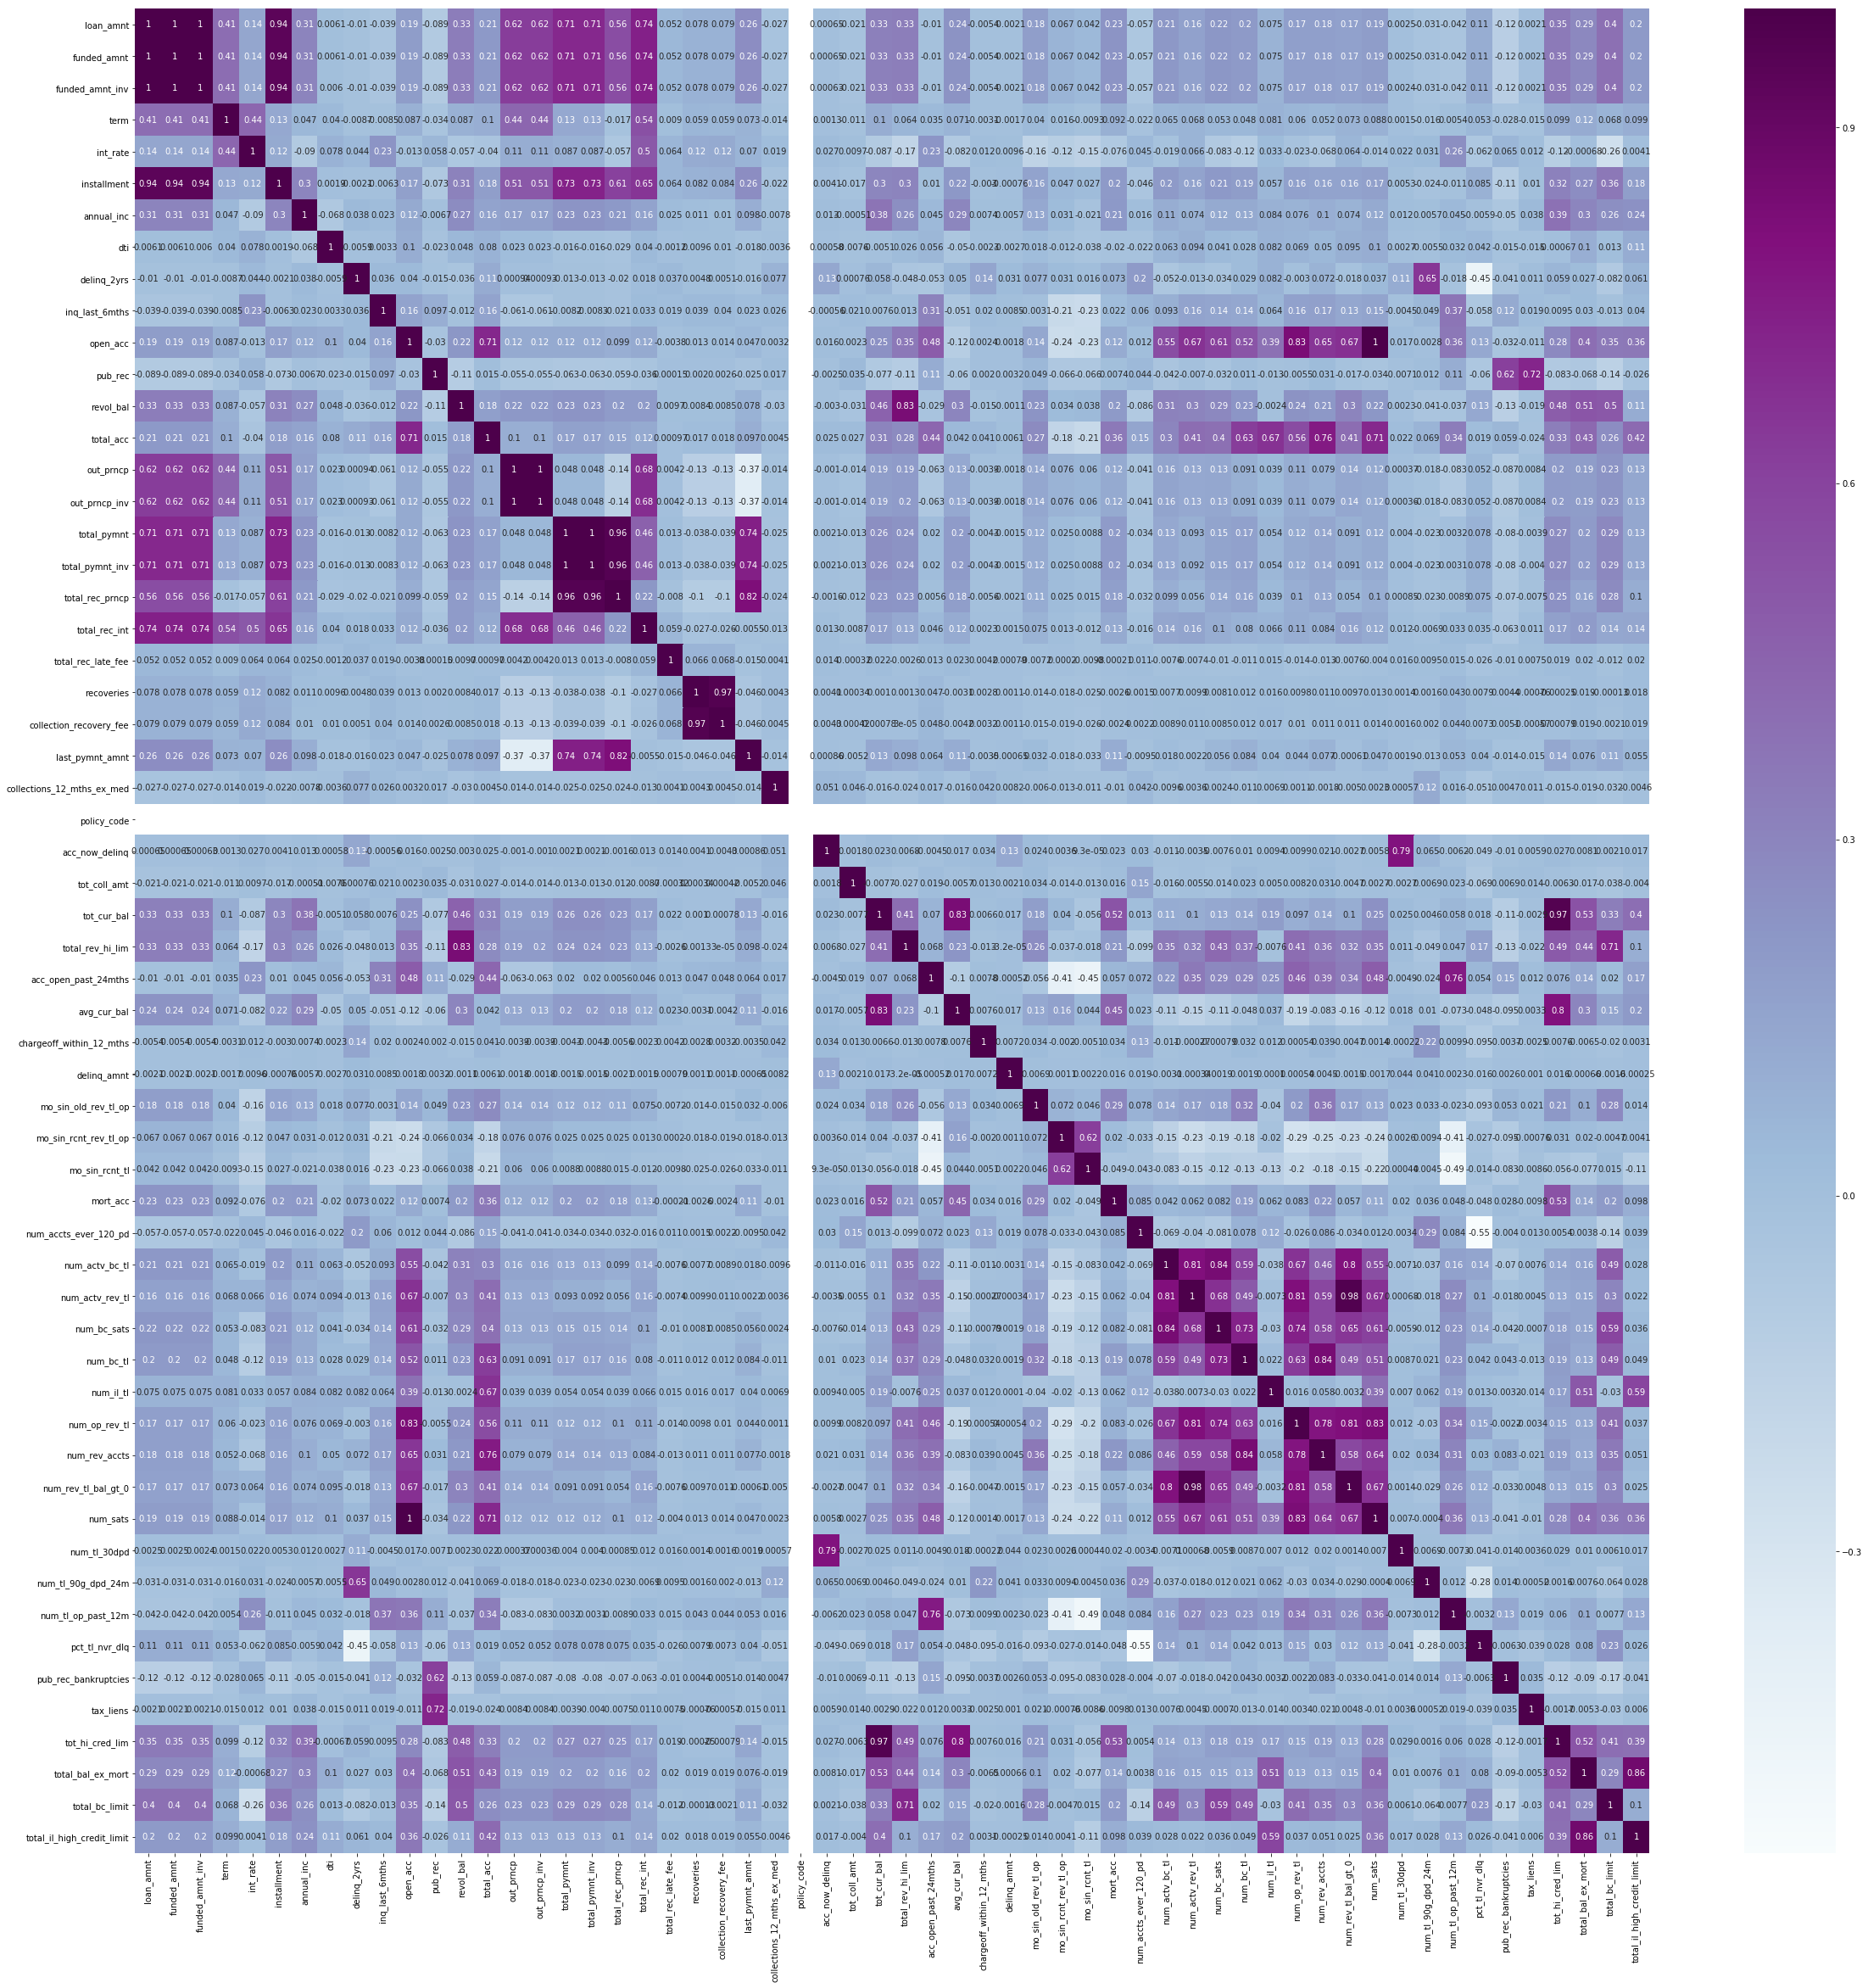

In [93]:
# Attempting correlation plot, although it's going to be illegible. 

plt.figure(figsize=(40, 40))
sns.heatmap(y2015.corr(), annot=True, cmap='BuPu')

In [23]:
#X.drop(X, axis=1, inplace=True)

In [94]:
# Second try for Random forest with 68 attributes 

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

# try the model with 68 features - mean cv score 95.92% with .005 stdev

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0001380443572998047 seconds ---
mean cv score:  0.9592775577569925 with std:  0.0053425767484009115
--- 379.69329833984375 seconds ---


In [151]:
# trying feature inportances 
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc.fit(X, y)

feature_imp = rfc.feature_importances_


In [162]:
print(len(feature_imp))
print(len(X.columns))

128
128


In [163]:
# Another way of showing the features and their importance scores 

feat_labels = X.columns

for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('loan_amnt', 0.00938059989539101)
('funded_amnt', 0.007449260946140165)
('funded_amnt_inv', 0.018702274970999893)
('term', 0.002395109462317734)
('int_rate', 0.00541391187777448)
('installment', 0.014526186631568006)
('annual_inc', 0.0035651681103967383)
('dti', 0.004482777236816694)
('delinq_2yrs', 0.0010394430698061564)
('inq_last_6mths', 0.0012554725180094401)
('open_acc', 0.002424113995606554)
('pub_rec', 0.0007468777696861056)
('revol_bal', 0.004384545146212565)
('total_acc', 0.003158380316898061)
('out_prncp', 0.2416252905945057)
('out_prncp_inv', 0.18046629446940438)
('total_pymnt', 0.03313782893418632)
('total_pymnt_inv', 0.031196610554871346)
('total_rec_prncp', 0.07847503855721422)
('total_rec_int', 0.016753749906443745)
('total_rec_late_fee', 0.0036499641593344323)
('recoveries', 0.008814617839948588)
('collection_recovery_fee', 0.018467334460992673)
('last_pymnt_amnt', 0.13459689017433413)
('collections_12_mths_ex_med', 0.00027056561032522727)
('policy_code', 0.0)
('acc_no

In [164]:
feature_imp = 100 * (feature_imp / feature_imp.max())
sorted_ftrs = np.argsort(feature_imp)[::-1] #returns the indices of the most important features, starting from the least important 
# [::-1] to make is a descending list
pos = np.arange(sorted_ftrs.shape[0])+.5


In [166]:
feature_imp[sorted_ftrs]

array([1.00000000e+02, 7.46884956e+01, 5.57048022e+01, 3.24779903e+01,
       2.63207886e+01, 1.37145532e+01, 1.29111528e+01, 7.74019761e+00,
       7.64296420e+00, 6.93377331e+00, 6.01186515e+00, 3.88229224e+00,
       3.64805266e+00, 3.26396073e+00, 3.08298065e+00, 2.24062302e+00,
       1.85525995e+00, 1.83600094e+00, 1.81460522e+00, 1.68774579e+00,
       1.62453582e+00, 1.60508445e+00, 1.55584102e+00, 1.54516213e+00,
       1.53466491e+00, 1.51058863e+00, 1.50484384e+00, 1.47549460e+00,
       1.31457027e+00, 1.30713979e+00, 1.26148743e+00, 1.22230199e+00,
       1.22027573e+00, 1.13826689e+00, 1.13492562e+00, 1.13298629e+00,
       1.04778922e+00, 1.01014549e+00, 1.00325342e+00, 1.00104067e+00,
       9.91249491e-01, 9.73511722e-01, 9.73251331e-01, 8.84626534e-01,
       8.58820033e-01, 8.17357010e-01, 7.86206178e-01, 7.26823831e-01,
       6.71844855e-01, 6.45784378e-01, 5.58752281e-01, 5.25719371e-01,
       5.19594830e-01, 4.96583380e-01, 4.71116062e-01, 4.58197583e-01,
      

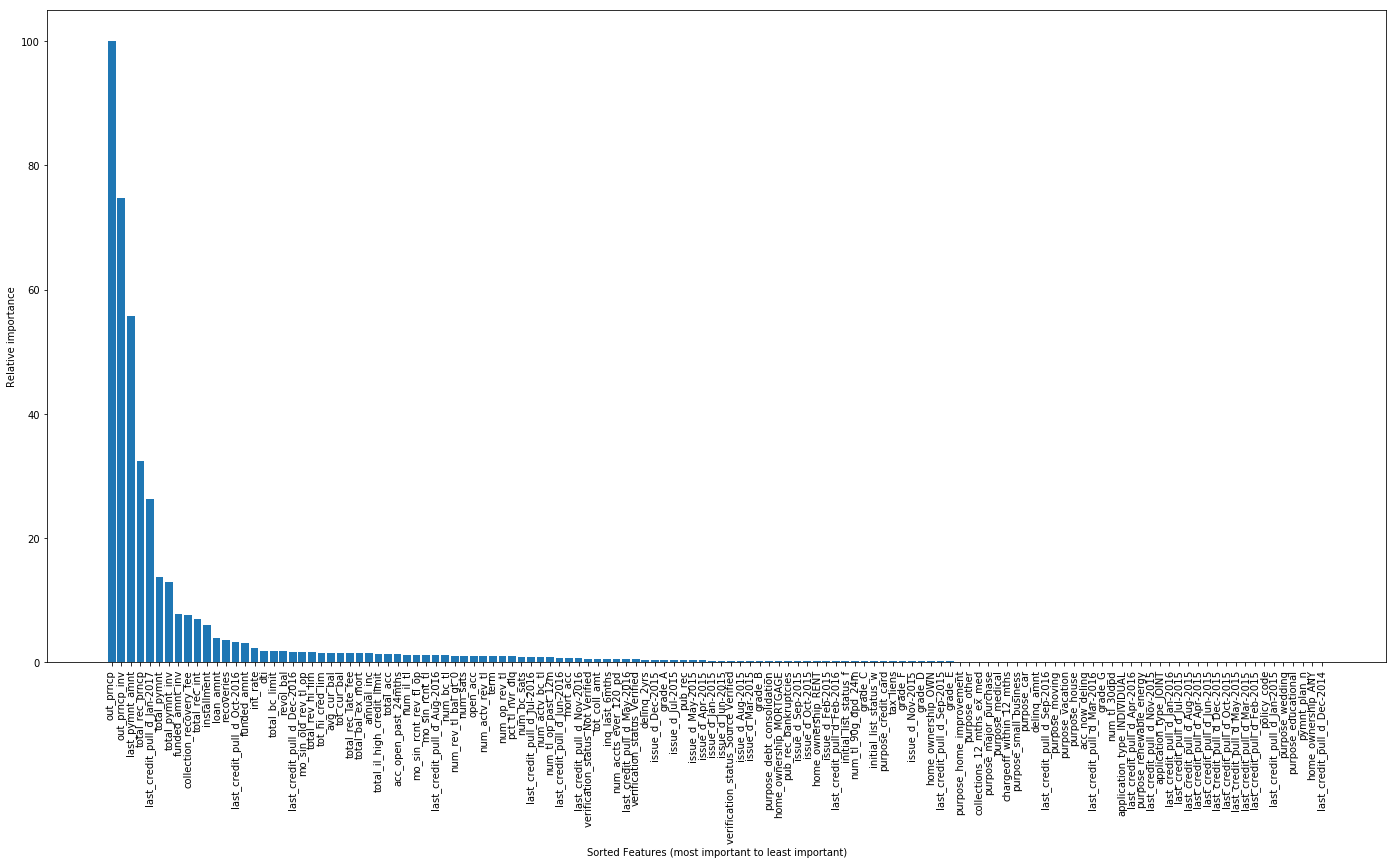

In [179]:
plt.figure(figsize=(24, 12))
plt.bar(pos, feature_imp[sorted_ftrs])
plt.xlabel('Sorted Features (most important to least important)')
plt.ylabel('Relative importance')
plt.xticks(pos, X.columns[sorted_ftrs], rotation=90)
plt.show()

In [184]:
# Selecting 10 most important features 

top10 = X.columns[sorted_ftrs][0:10]
top10

Index(['out_prncp', 'out_prncp_inv', 'last_pymnt_amnt', 'total_rec_prncp',
       'last_credit_pull_d_Jan-2017', 'total_pymnt', 'total_pymnt_inv',
       'funded_amnt_inv', 'collection_recovery_fee', 'total_rec_int'],
      dtype='object')

In [186]:
#X[top10]

In [190]:
# Running RF with top 10 features 
import time
start_time = time.time()
print('start time: ', start_time)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc10 = RandomForestClassifier()
X10 = X[top10]
y = y2015.loan_status

X10 = X10.dropna(axis=1)

score = cross_val_score(rfc10, X10, y, cv=10)
print('Mean CV score: ', score.mean(), 'with standard deviation ', score.std())
print("runtime: ___ %s ___" % (time.time() - start_time))


start time:  1537306970.007188
Mean CV score:  0.9316287489180459 with standard deviation  0.0451037522179437
runtime: ___ 222.68539094924927 ___


Even with top 10 features we get 93% accuracy. 


In [191]:
# Selecting top 30 features

top30 = X.columns[sorted_ftrs][0:30]

X30 = X[top30]


In [192]:
# Running Random Forest with top 30 features 

start_time = time.time()

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rfc30 = RandomForestClassifier()
y = y2015.loan_status

X30 = X30.dropna(axis=1)

score = cross_val_score(rfc30, X30, y, cv=10)
print("Mean CV ", score.mean(), 'with standard deviation ', score.std())
print('Runtime --- %s ---' % (time.time() - start_time))

Mean CV  0.9550435958158611 with standard deviation  0.022041034241460047
Runtime --- 385.76691794395447 ---


With 30 top features, the mean crossvalidated accuracy is   95% with a standard deviation of  0.022. 

__Next challenge__:
- Run the Random Forest without using anything related to payment amount or outstanding principal?

In [193]:
# Selecting top 50 features

top50 = X.columns[sorted_ftrs][0:50]

X50 = X[top50]


In [194]:
# Running Random Forest with top 50 features 

start_time = time.time()

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rfc50 = RandomForestClassifier()
y = y2015.loan_status

X50 = X50.dropna(axis=1)

score = cross_val_score(rfc50, X50, y, cv=10)
print("Mean CV ", score.mean(), 'with standard deviation ', score.std())
print('Runtime --- %s ---' % (time.time() - start_time))

Mean CV  0.9595768541182906 with standard deviation  0.006891589798976791
Runtime --- 488.5968279838562 ---


In [198]:
top50

Index(['out_prncp', 'out_prncp_inv', 'last_pymnt_amnt', 'total_rec_prncp',
       'last_credit_pull_d_Jan-2017', 'total_pymnt', 'total_pymnt_inv',
       'funded_amnt_inv', 'collection_recovery_fee', 'total_rec_int',
       'installment', 'loan_amnt', 'recoveries', 'last_credit_pull_d_Oct-2016',
       'funded_amnt', 'int_rate', 'dti', 'total_bc_limit', 'revol_bal',
       'last_credit_pull_d_Dec-2016', 'mo_sin_old_rev_tl_op',
       'total_rev_hi_lim', 'tot_hi_cred_lim', 'avg_cur_bal', 'tot_cur_bal',
       'total_rec_late_fee', 'total_bal_ex_mort', 'annual_inc',
       'total_il_high_credit_limit', 'total_acc', 'acc_open_past_24mths',
       'num_il_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'last_credit_pull_d_Aug-2016', 'num_bc_tl', 'num_rev_tl_bal_gt_0',
       'num_sats', 'open_acc', 'num_actv_rev_tl', 'term', 'num_op_rev_tl',
       'pct_tl_nvr_dlq', 'num_bc_sats', 'last_credit_pull_d_Jul-2016',
       'num_actv_bc_tl', 'num_tl_op_past_12m', 'last_credit_pull_d_Jun-2

In [199]:
# removing all payment amount or outstanding principal 

no_paymnt_outpr = ['total_rec_prncp',
       'last_credit_pull_d_Jan-2017', 
       'funded_amnt_inv', 'collection_recovery_fee', 'total_rec_int',
       'installment', 'loan_amnt', 'recoveries', 'last_credit_pull_d_Oct-2016',
       'funded_amnt', 'int_rate', 'dti', 'total_bc_limit', 'revol_bal',
       'last_credit_pull_d_Dec-2016', 'mo_sin_old_rev_tl_op',
       'total_rev_hi_lim', 'tot_hi_cred_lim', 'avg_cur_bal', 'tot_cur_bal',
       'total_rec_late_fee', 'total_bal_ex_mort', 'annual_inc',
       'total_il_high_credit_limit', 'total_acc', 'acc_open_past_24mths',
       'num_il_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'last_credit_pull_d_Aug-2016', 'num_bc_tl', 'num_rev_tl_bal_gt_0',
       'num_sats', 'open_acc', 'num_actv_rev_tl', 'term', 'num_op_rev_tl',
       'pct_tl_nvr_dlq', 'num_bc_sats', 'last_credit_pull_d_Jul-2016',
       'num_actv_bc_tl', 'num_tl_op_past_12m', 'last_credit_pull_d_Jun-2016',
       'mort_acc', 'last_credit_pull_d_Nov-2016']

In [202]:
X_a = X[no_paymnt_outpr]

In [203]:

start_time = time.time()

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rfc50_a = RandomForestClassifier()
y = y2015.loan_status

X_a = X_a.dropna(axis=1)

score = cross_val_score(rfc50_a, X_a, y, cv=10)
print("Mean CV without payment amount or outstanding principal", score.mean(), 'with standard deviation ', score.std())
print('Runtime --- %s ---' % (time.time() - start_time))

Mean CV without payment amount or outstanding principal 0.9332667781347072 with standard deviation  0.003825061001142167
Runtime --- 453.78678488731384 ---


How do we know? 

Even after running Random Forest with top 50 features without the payment amount or outstanding principal, the mean cross-validated accuracy is . So, for the purpose of this dataset, we see than these features are the most important features and an accuracy of 90% or more is not possible even after feature engineering and feature selection. 



In [204]:
X_a = X[no_paymnt_outpr]

start_time = time.time()

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rfc50_a = RandomForestClassifier()
y = y2015.loan_status

#X_a = X_a.dropna(axis=1)

score = cross_val_score(rfc50_a, X_a, y, cv=10)
print("Mean CV without payment amount or outstanding principal", score.mean(), 'with standard deviation ', score.std())
print('Runtime --- %s ---' % (time.time() - start_time))

Mean CV without payment amount or outstanding principal 0.9338889301683414 with standard deviation  0.004364016181713566
Runtime --- 462.7022340297699 ---


In [ ]:
# made copy and pushed --
# This is the non-pushed version. 

In [ ]:
# Running VarianceThreshold

from sklearn.feature_selection import VarianceThreshold  
# Feature selector removes all low-variance features (or that doesn’t meet some threshold)
# Algo looks only at X not the y, good for unsupervised Learning. 

selector = VarianceThreshold()
X_select = selector.fit_transform(X)
#X_select #Returns values of features in X and in the original index

ftr_imp = selector.variances_  #19, returns variance of each feature 
ftr_index = np.argsort(ftr_imp) ##returns index array with sorting values ascendingly n


In [ ]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5



In [ ]:
plt.figure(figsize=(8, 18))
plt.barh(pos, ftr_imp[ftr_index], align='center')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.yticks(pos, X.columns[ftr_index])
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

rfc = RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc.fit(X, y)

#score = cross_val_score(rfc, X, y, cv=10)
#print('mean cv score: ', score.mean(), 'with std: ', score.std() )
#print("--- %s seconds ---" % (time.time() - start_time))

--- 4.6253204345703125e-05 seconds ---


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())  # 100* 0-1
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5



In [52]:
top_10_ftrs = X.columns[sorted_features[::-1]][0:11]

In [53]:
Xa = X[top_10_ftrs]

In [55]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

rfc = RandomForestClassifier()
#X = Xa
y = y2015['loan_status']

#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

rfc.fit(Xa, y)

score = cross_val_score(rfc, Xa, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 4.410743713378906e-05 seconds ---
mean cv score:  0.9715907950262412 with std:  0.005258487500489647
--- 275.8921420574188 seconds ---


In [57]:
# top 30 features 

top_30_ftrs = X.columns[sorted_features[::-1]][0:31]

In [58]:
top_30_ftrs

Index(['out_prncp_inv', 'last_pymnt_d_Jan-2017', 'out_prncp',
       'total_rec_prncp', 'next_pymnt_d_Feb-2017', 'last_pymnt_amnt',
       'total_pymnt_inv', 'last_credit_pull_d_Jan-2017',
       'last_pymnt_d_Dec-2016', 'total_pymnt', 'collection_recovery_fee',
       'funded_amnt', 'last_credit_pull_d_Oct-2016', 'total_rec_int',
       'last_pymnt_d_Oct-2016', 'last_pymnt_d_Nov-2016',
       'last_pymnt_d_Sep-2016', 'funded_amnt_inv', 'loan_amnt', 'installment',
       'int_rate', 'last_pymnt_d_Jul-2016', 'last_credit_pull_d_Nov-2016',
       'last_pymnt_d_Aug-2016', 'total_rec_late_fee', 'recoveries',
       'annual_inc', 'last_pymnt_d_Feb-2016', 'dti', 'tot_hi_cred_lim',
       'mo_sin_old_rev_tl_op'],
      dtype='object')

In [62]:
no_paym_outpr = ['last_credit_pull_d_Jan-2017','collection_recovery_fee',
       'funded_amnt', 'last_credit_pull_d_Oct-2016', 'total_rec_int', 'funded_amnt_inv', 'loan_amnt', 'installment',
       'int_rate', 'last_credit_pull_d_Nov-2016', 'total_rec_late_fee', 'recoveries',
       'annual_inc', 'dti', 'tot_hi_cred_lim',
       'mo_sin_old_rev_tl_op']

In [61]:
y.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [63]:
Xb = X[no_paym_outpr]

In [64]:
Xb.head()

,last_credit_pull_d_Jan-2017,collection_recovery_fee,funded_amnt,last_credit_pull_d_Oct-2016,total_rec_int,funded_amnt_inv,loan_amnt,installment,int_rate,last_credit_pull_d_Nov-2016,total_rec_late_fee,recoveries,annual_inc,dti,tot_hi_cred_lim,mo_sin_old_rev_tl_op
0,1,0.0,16000.0,0,2188.56,16000.0,16000.0,379.39,14.85,0,0.0,0.0,48000.0,33.18,298100.0,294.0
1,1,0.0,9600.0,0,608.66,9600.0,9600.0,298.58,7.49,0,0.0,0.0,60000.0,22.44,88635.0,91.0
2,1,0.0,25000.0,0,1224.23,25000.0,25000.0,777.55,7.49,0,0.0,0.0,109000.0,26.02,373572.0,168.0
3,1,0.0,28000.0,0,1535.13,28000.0,28000.0,858.05,6.49,0,0.0,0.0,92000.0,21.60,304003.0,379.0
4,0,0.0,8650.0,0,540.49,8650.0,8650.0,320.99,19.89,0,0.0,0.0,55000.0,25.49,38998.0,95.0


In [66]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

rfc = RandomForestClassifier()
#X = Xa
y = y2015['loan_status']

#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

rfc.fit(Xb, y)

score = cross_val_score(rfc, Xb, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 4.76837158203125e-05 seconds ---
mean cv score:  0.8582576434282281 with std:  0.0197246489437738
--- 339.7293448448181 seconds ---


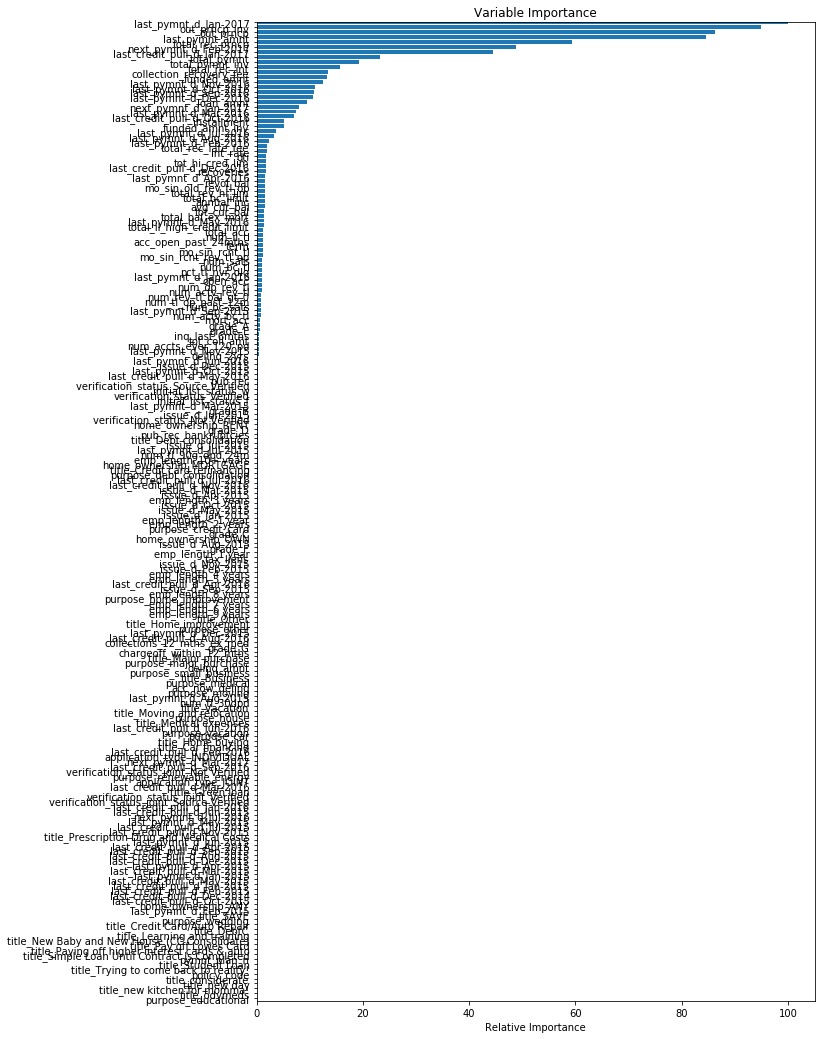

In [35]:
plt.figure(figsize=(10, 18))
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.ylim(0, 10)
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.yticks(pos, X.columns[sorted_features])
plt.show()

In [113]:
#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score
#
#rfc = ensemble.RandomForestClassifier(max_features= 50, verbose=3)
#X = y2015.drop('loan_status', 1)
#y = y2015['loan_status']
#
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)
#
#score = cross_val_score(rfc, X, y, cv=10)
#print('mean cv score: ', score.mean(), 'with std: ', score.std() )
#print("--- %s seconds ---" % (time.time() - start_time))

building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.8s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.7s remaining:    0.0s


building tree 3 of 10


KeyboardInterrupt: 